In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image

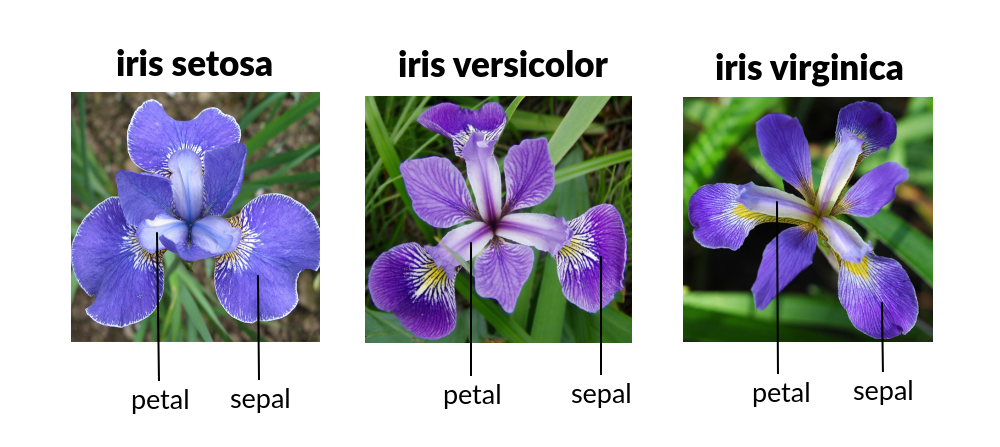

In [55]:
Image('iris_images.png')

In [35]:
iris = pd.read_csv('iris-data.csv')

In [5]:
# CHECK TYPE OF DATA

iris.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# The count for petal_width_cm is 145 and all the others are 150

# Not a lot of difference between petal_with_cm min and max value

# The main difference is between min and mx sepal_length_cm

iris.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

In [39]:
# CHECK NULL VALUES

iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [45]:
# replace null values with the mean 

iris['petal_width_cm'] = iris['petal_width_cm'].fillna((iris['petal_width_cm'].mean()))

iris.isnull().sum()


sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

<AxesSubplot:>

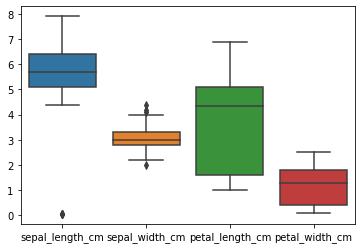

In [36]:
# OUTLIERS

irisbox = iris[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm']]
sns.boxplot(data=irisbox)

<AxesSubplot:>

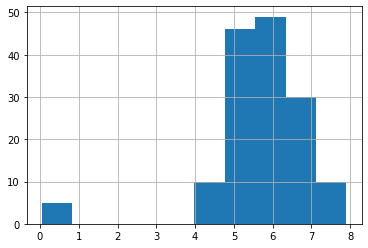

In [16]:
iris.sepal_length_cm.hist()

In [47]:
# we see that there are 4 rows with an outlier of sepal_length_cm being less than 4

iris.sepal_length_cm.value_counts()

5.000    10
6.300     9
5.100     9
5.700     8
6.700     7
5.800     7
6.400     7
5.600     7
5.400     6
4.900     6
6.100     6
6.500     5
6.000     5
5.500     5
4.800     5
6.200     4
5.200     4
6.900     4
4.600     4
7.700     3
7.200     3
4.400     3
6.800     3
5.900     3
0.055     2
6.600     2
4.700     2
7.900     1
4.500     1
7.000     1
7.300     1
7.400     1
0.057     1
7.600     1
5.300     1
0.060     1
7.100     1
0.067     1
Name: sepal_length_cm, dtype: int64

In [18]:
iris.corr()

sepal_length_cm  sepal_width_cm  petal_length_cm  \
sepal_length_cm         1.000000        0.066091         0.489083   
sepal_width_cm          0.066091        1.000000        -0.419796   
petal_length_cm         0.489083       -0.419796         1.000000   
petal_width_cm          0.469734       -0.348464         0.958934   

                 petal_width_cm  
sepal_length_cm        0.469734  
sepal_width_cm        -0.348464  
petal_length_cm        0.958934  
petal_width_cm         1.000000

<AxesSubplot:>

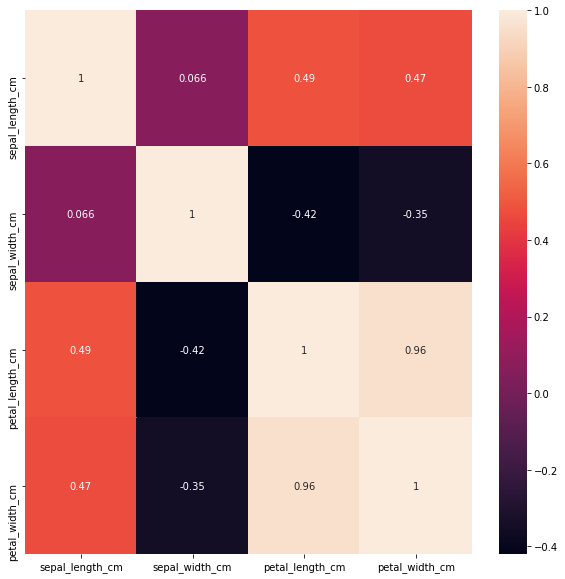

In [15]:
# High correlation between petal lenght and petal width

plt.subplots(figsize=(10,10))
sns.heatmap(iris.corr(), annot=True)

In [50]:
df = px.data.iris()
fig = px.scatter_matrix(df,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species")
fig.show()

In [25]:
# OPTIONAL : drop column petal_width_cm


# Not a lot of difference between petal_width_cm max and minimum values
# High correlation between petal_lenght and petal_width, betterfor ML modeling

# iris.drop(['petal_width_cm'], axis=1, inplace=True)



In [27]:
# DROP OUTLIERS

# We just have 4 values on sepal_length_cm that are almost zero so we can delete them

iris = iris.loc[iris['sepal_length_cm'] >4 ]

iris.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       145.000000      145.000000       145.000000      140.000000
mean          5.837241        3.068276         3.746897        1.235714
std           0.813936        0.431680         1.790564        0.766574
min           4.400000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.500000        0.300000
50%           5.800000        3.000000         4.400000        1.350000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

In [37]:
# We can't do the same for petal_length_cm since we have a lot of small values

# iris.petal_length_cm.value_counts() 

In [8]:
# We need to fix the classes repeating

iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [28]:
def clean_class(x):
    if x == 'Iris-setossa':
        x = 'Iris-setosa'
    elif x == 'versicolor':
        x = 'Iris-versicolor'    
    else:
        x = x
    return x

iris['class'] = iris['class'].apply(lambda x: clean_class(x))

In [29]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    45
Name: class, dtype: int64